## 1. Variational Inference

Variational Inference (VI) is a method for approximating the posterior in Bayesian models. Instead of sampling via Markov Chain Monte Carlo (MCMC) to approximate an intractable posterior, Variational Inference performs optimization. 

For a restricted set of distributions, Variational Inference finds the distribution in that set that is closest to the true posterior in terms of the KL divergence.  The goal is  to only consider tractable distributions, while still allowing for enough flexibility to obtain a distribution that approximates the true posterior well. 

Variational inference can be faster than MCMC methods and tends to scale well.  As a result, different forms of Variational Inference are commonly used in modern machine learning methods to perform Bayesian inference. 

The derivations and layout follow *Pattern Recognition and Machine Learning* by Chris Bishop (https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).

Let $X$ represent the observed variables, and $Z$ represent the latent variables and the parameters.  Let $p$ represent the true posterior and assume that we want to approximate $p$ with a more tractable distribution, $q$. 

Assuming a form of the approximate posterior, we want to find the  distribution $q$ that is "closest" to the true posterior $p$. We can measure the "closeness" of distributions in terms of the KL divergence (https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence). 

For a given distribution $q$, we can write the log likelihood of the observed data as:

\begin{aligned}
\log p(x) &= \sum_z q(z) \log p(X) \\
&= \sum_z q(z) \log\left(\dfrac{p(X, Z)}{p(Z|X)}\right) \\
&= \sum_z q(z) \log\left(\dfrac{p(X, Z)}{p(Z|X)}\dfrac{q(Z)}{q(Z)}\right) \\
&= \sum_z q(z) \left(\log\left(\dfrac{p(X, Z)}{q(Z)}\right) + \log\left(\dfrac{q(Z)}{p(Z|X)}\right)\right) \\
&= \sum_z q(z) \left(\log\left(\dfrac{p(X, Z)}{q(Z)}\right) - \log\left(\dfrac{p(Z|X}{q(Z)}\right)\right) \\
&= \sum_z q(Z) \log\left(\dfrac{p(X, Z)}{q(Z)}\right) - \sum_z q(z) \log\left(\dfrac{p(Z|X)}{q(Z)}\right) \\
\log p(X) &= L(q) + KL(q||p) \\
L(q) &= \sum_z q(Z) \log\left(\dfrac{p(X, Z)}{q(Z)}\right) \\
KL(q||p) &= - \sum_z q(Z) \log\left(\dfrac{p(Z|X)}{q(Z)}\right) 
\end{aligned}

More generally, we have that 
\begin{aligned}
\log p(X) &= L(q) + KL(q||p) \\
L(q) &= \int q(Z) \log\left(\dfrac{p(X, Z)}{q(Z)}\right)dZ \\
KL(q||p) &= - \int q(Z) \log\left(\dfrac{p(Z|X)}{q(Z)}\right)dZ 
\end{aligned}

We can see that minimizing $KL(q||p)$ is equivalent to maximizing $L(q)$.  That is, for a choice of family of distributions $q$, variational inference finds the specific distribution that maximizes $L(q)$, and is thus the closest member of the approximate family to the true posterior in terms of the KL divergence.

## 2. Mean Field Approximation

The mean field approximation is a common choice to restrict the distributions under consideration in variational inference.  

If we partition the elements of $Z$ into $M$ disjoint groups, then the mean field approximation assumes that these distributions factor, that is that:
$$q(Z) = \prod_{i=1}^M q_i(Z_i).$$

Then, under the mean field approximation, we can find the distribution of the form above that maximizes the lower bound $L(q)$. (Let $q_j$ be shorthand for $q_j(Z_j)$):

\begin{aligned}
L(q) &= \int q(Z) \log\left(\dfrac{p(X, Z)}{q(Z)}\right)dZ \\ 
&= \int \prod_i q_i \left(\log p(X, Z) - \sum_i \log q_i\right)dZ \\
&= \int q_j \prod_{i\neq j} \left(\log p(X, Z) - \sum_i \log q_i\right)dZ \\
&= \int q_j \prod_{i\neq j} \log p(X, Z)dZ - \int q_j \prod_{i\neq j}\sum_i \log q_i dZ \\
&= \int q_j \left(\int \log p(X, Z)\prod_{i\neq j}q_i dZ_i\right)dZ_j - \int q_j \log q_j dZ_j + const. \\
\end{aligned}

Each $\int q_i dZ_i$ term integrates to 1, since $q_i$ is a proability distribution.

\begin{aligned}
\implies L(q) &= \int q_j \log \tilde{p}(X, Z_j)dZ_j - \int q_j\log q_j dZ_j \\
\log \tilde{p}(X, Z_j) &= \mathbb{E}_{i\neq j} \left(\log p(X, Z)\right) + const. \\
\mathbb{E}_{i\neq j} \left(\log p(X, Z)\right) &= \int p(X, Z)\prod_{i\neq j} q_i dZ_i
\end{aligned}

Now, we need to maximize $L(q)$ with respect to $q_j$, while holding all $q_{i\neq j}$ fixed. This is equivalent to minimizing the KL divergence.

This minimum occurs when $q_j(Z_j) = \tilde{p}(X, Z_j)$.

$$\implies \log q_j^*(Z_j) = \mathbb{E}_{i\neq j} \left(\log p(X, Z)\right) + const.$$



The normalizing constant is usually determined by inspection.  The optimal form of $q_j^*$ depends on the values of the other $q_{i\neq j}$, so the $q_i$ are all initalized and then cycled through, one at a time.

Since the bound $L(q)$ is convex with respect to each factor $q_i$, convergence is guarenteed.

Minimizing $KL(q||p)$ leads to distributions $q$ that tend to underestimate the variance of $p$. Likewise, for multimodal posteriors, minimizing $KL(q||p)$ will find one mode.

## 3. Univariate Gaussian Example

As a simple example of Variational Inference in practice, we will find the approximate posteriors of the mean and precision for a univariate Gaussian.

The likelihood of the data is:
\begin{aligned}
p(x_{1:N} |\mu, \tau) &= \prod_{n=1}^N N(x_n | \mu, \tau^{-1}) \\
&= \left(\dfrac{\tau}{2\pi}\right)^{N/2}\mbox{exp}\left(-\dfrac{\tau}{2} \sum_{n=1}^N (x_n - \mu)^2\right)
\end{aligned}

The priors for $\mu$ and $\tau$ are:
\begin{aligned}
p(\mu | \tau) &= N(\mu | \mu_0, (\lambda_0\tau)^{-1}) \\
p(\tau) &= \mbox{Gamma}(\tau | a_0, b_0) \\
\end{aligned}

We will assume a mean-field approximation for the approximate posterior $q$:
$$q(\mu, \tau) = q_{\mu}(\mu)q_{\tau}(\tau)$$

Then, using the result that
$$\log q_j^*(Z_j) = \mathbb{E}_{i\neq j} \left(\log p(X, Z)\right) + const., $$
we can find the optimal form of $q$.

\begin{aligned}
\log q^*_{\mu}(\mu) &= \mathbb{E}_{\tau}\left(\log p(x_{1:N}|\mu, \tau) + \log p(\mu |\tau)\right) + const. \\
&= \mathbb{E}_{\tau}\left(-\dfrac{\tau}{2}\sum_{n=1}^N (x_n - \mu)^2 - \dfrac{\lambda_0 \tau}{2}(\mu - \mu_0)^2\right) + const. \\
&= -\dfrac{\mathbb{E}_{\tau}(\tau)}{2}\left(\lambda_0(\mu - \mu_0)^2 + \sum_{n=1}^N (x_n - \mu)^2\right) + const. \\
& = -\dfrac{\mathbb{E}_{\tau}(\tau)}{2}(\lambda_0 + N)\left(\mu - \dfrac{\lambda_0\mu_0 + N\bar{x}}{\lambda_0 + N}\right)^2 + const. \mbox{ (complete the square)} \\
\end{aligned}

This is a quadratic form in the exponent, which means that $q^*_{\mu}$ will be normally distributed:
\begin{aligned}
q^*_{\mu}(\mu) &= N(\mu | \mu_N, \lambda_N^{-1}) \\
\mu_N &= \dfrac{\lambda_0\mu_0 + N\bar{x}}{\lambda_0 + N} \\
\lambda_N &= (\lambda_0 + N)\mathbb{E}(\tau) 
\end{aligned}

\begin{aligned}
\log q^*_{\tau}(\tau) &= \mathbb{E}_{\mu}\left(\log p(x_{1:N} | \mu, \tau) + \log p(\mu | \tau)\right) + \log p(\tau) + const. \\
&= \mathbb{E}_{\mu} \left(\frac{N}{2}\log \tau - \frac{\tau}{2}\sum_{n=1}^N(x_N - \mu)^2 + \log\tau - \frac{\lambda_0}{2}(\mu - \mu_0)^2\tau\right) + (a_0 - 1)\log\tau - b_0\tau + const. \\
&= \left(a_0 + \dfrac{N}{2}\right)\log\tau - \tau\left(b_0 + \dfrac{1}{2} \mathbb{E}_{\mu}\left(\sum_{n=1}^N (x_n - \mu)^2 + \lambda_0(\mu - \mu_0)^2\right)\right) + const. \\
\end{aligned}

This is the form of the log of a Gamma distribution.  Therefore, we have that

\begin{aligned}
q_{\tau}(\tau) &= \mbox{Gamma}(\tau | a_N, b_N) \\
a_N &= a_0 + \dfrac{N}{2} \\
b_N &= b_0 + \dfrac{1}{2} \mathbb{E}_{\mu} \left(\sum_{n=1}^N (x_n - \mu)^2 + \lambda_0(\mu - \mu_0)^2\right)
\end{aligned}


Then, the parameters $\mu$ and $\tau$ can be iteratively updated.  These specific forms of $q_{\mu}$ and $q_{\tau}$ were not specifically assumed and arose as a result of conjugate priors and the structure of the likelihood.

\begin{aligned}
\mathbb{E}(\tau) &= \dfrac{a_N}{b_N} \\
\mathbb{E}(\mu) &= \mu_N \\
\mathbb{E}(\mu^2) &= \mathbb{E}(\mu)^2 + \mathbb{V}(\mu) \\
&= \mu_N^2 + \lambda_N^{-1} \\
\mathbb{E}_{\mu} \left(\sum_{n=1}^N (x_N - \mu)^2 + \lambda_0(\mu - \mu_0)^2\right) &= \mathbb{E}(\mu^2) (N + \lambda_0) - 2\mathbb{E}(\mu)(N\bar{x} + \lambda_0\mu_0) + \left(\lambda_0\mu_0^2 + \sum_n x_n^2\right)
\end{aligned}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm

In [21]:
## X is the data
## mu0, lambda0, a0, b0 are prior hyperparameter values
## crit is convergence criteria tolerance
def Univariate_VI(X, mu0, lambda0, a0, b0, crit):
    N = len(X) ## number of data points 
    
    # Randomly initialize starting values for parameters of q
    muN = 0
    lambdaN = 1
    aN = 1
    bN = 1
    
    # Initialize data structures
    ll_old = 10E10
    ll_new = 0
    converge = 10E10 # current difference in log likelihoods to check for convergence
    
    while converge > crit:
    
        ## (1).  Update q(mu)
        muN = (lambda0*mu0 + N*np.mean(X))/(lambda0 + N)
        lambdaN = (lambda0 + N)*aN/bN
        
            
        ## (2). Update q(tau)
        aN = a0 + N/2
        Emu2 = muN**2 + 1/lambdaN ## expectation of mu^2
        bN = b0 + 0.5*(Emu2*(N+lambda0) - 2*muN*(N*np.mean(X) + lambda0*mu0) + lambda0*mu0**2 + np.sum(X**2))
        
        
        ## Check convergence criteria (log likelihood using posterior mean for parameter values)
        ll_new = np.sum(norm(loc = muN, scale = np.sqrt(bN/aN)).pdf(X))
        converge = abs(ll_new - ll_old)
        ll_old = ll_new
        #print(converge)
        
        
    return(muN, lambdaN, aN, bN)

In [22]:
## Generate data
tau_true = 5
mu_true = 2
X = np.random.normal(loc = mu_true, scale = np.sqrt(1/tau_true), size = 100)


mu0 = 0
lambda0 = 1
a0 = 1
b0 = 1
muN, lambdaN, aN, bN = Univariate_VI(X, mu0, lambda0, a0, b0, 0.0001)

In [23]:
muN

1.998773432892913

In [24]:
aN/bN

3.8705297607077496

In [36]:
## Simulate values from posterior
tau_post = np.random.gamma(shape = aN, scale = bN, size = 1000)
mu_post = np.random.normal(muN, lambdaN, size = 1000)
X_sim = np.random.normal(mu_post, np.sqrt(1/tau_post))

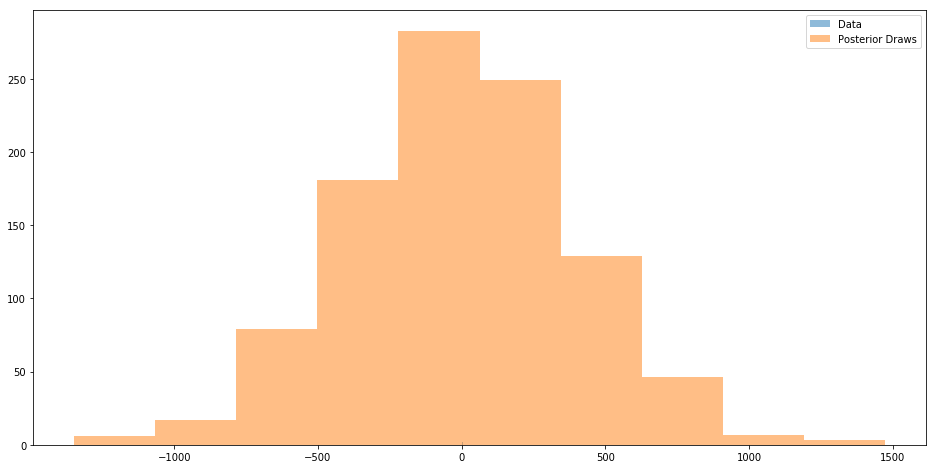

In [38]:
plt.figure(figsize = (16,8))
plt.hist(X, alpha = 0.5, label = "Data")
plt.hist(X_sim, alpha = 0.5, label = "Posterior Draws")
plt.legend(loc = "upper right")
pass

## References

*Pattern Recognition and Machine Learning* by Chris Bishop (https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).